In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

#Bước 1: Đọc và hiển thị dữ liệu

In [ ]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Data Mining/diabetes_prediction_dataset.csv', sep =";")
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
diabetes_df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


#Bước 2: Kiểm tra tính duy nhất của dữ liệu với mỗi thuộc tính

In [ ]:
diabetes_df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [ ]:
print(diabetes_df['gender'].unique())
print(diabetes_df['hypertension'].unique())
print(diabetes_df['heart_disease'].unique())
print(diabetes_df['smoking_history'].unique())
print(diabetes_df['diabetes'].unique())

['Female' 'Male' 'Other']
[0 1]
[1 0]
['never' 'No Info' 'current' 'former' 'ever' 'not current']
[0 1]


#Bước 3: Xóa những dòng dữ liệu không hợp lệ ở cột gender và smoking_history

In [ ]:
diabetes_df = diabetes_df.drop(diabetes_df[diabetes_df['smoking_history'] == 'No Info'].index)
diabetes_df = diabetes_df.drop(diabetes_df[diabetes_df['gender'] == 'Other'].index)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64172 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               64172 non-null  object 
 1   age                  64172 non-null  float64
 2   hypertension         64172 non-null  int64  
 3   heart_disease        64172 non-null  int64  
 4   smoking_history      64172 non-null  object 
 5   bmi                  64172 non-null  float64
 6   HbA1c_level          64172 non-null  float64
 7   blood_glucose_level  64172 non-null  int64  
 8   diabetes             64172 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.9+ MB


In [ ]:
diabetes_df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
11,Female,54.0,0,0,former,54.70,6.0,100,0


In [ ]:
print(diabetes_df["age"].value_counts())
print(diabetes_df["blood_glucose_level"].value_counts())
print(diabetes_df["HbA1c_level"].value_counts())
print(diabetes_df["bmi"].value_counts())
print(diabetes_df["hypertension"].value_counts())
print(diabetes_df["heart_disease"].value_counts())
print(diabetes_df["smoking_history"].value_counts())
print(diabetes_df["gender"].value_counts())
print(diabetes_df['diabetes'].value_counts())


age
80.00    3822
51.00    1198
49.00    1172
52.00    1167
53.00    1163
         ... 
0.48        4
1.00        4
0.64        3
0.16        3
0.56        2
Name: count, Length: 101, dtype: int64
blood_glucose_level
140    5025
160    4998
159    4968
130    4957
155    4923
145    4878
126    4876
200    4873
158    4460
80     4434
100    4431
90     4384
85     4274
280     599
300     547
260     526
240     518
220     501
Name: count, dtype: int64
HbA1c_level
6.6    5438
6.2    5424
5.7    5376
6.0    5321
6.5    5292
5.8    5291
6.1    5164
3.5    4836
4.8    4740
4.5    4729
4.0    4677
5.0    4674
9.0     548
8.8     546
8.2     541
7.5     534
6.8     528
7.0     513
Name: count, dtype: int64
bmi
27.32    12045
25.60       83
25.00       82
23.00       79
24.60       77
         ...  
46.70        1
13.74        1
59.56        1
47.70        1
60.52        1
Name: count, Length: 3943, dtype: int64
hypertension
0    57889
1     6283
Name: count, dtype: int64
heart_disease
0  

#Bước 4: Rời rạc hóa các dữ liệu bằng phương pháp Binning

In [ ]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000
mean,46.547268,0.097909,0.047045,28.424262,5.564279,139.629792,0.109799
std,19.539695,0.297194,0.211738,6.515975,1.095535,42.166693,0.312641
min,0.160000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,31.000000,0.000000,0.000000,24.600000,4.800000,100.000000,0.000000
50%,47.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,61.000000,0.000000,0.000000,31.100000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,91.820000,9.000000,300.000000,1.000000


In [ ]:
diabetes_df['age'] = pd.cut(diabetes_df['age'], bins=[0, 16, 32, 48, 64, float('inf')], labels=['0-16', '16-32', '32-48', '48-64', '64+'])

In [ ]:
diabetes_df['bmi'] = pd.cut(diabetes_df['bmi'], bins=[0, 18.5, 25, float('inf')], labels=['Underweight', 'Balance', 'Overweight'])

In [ ]:
diabetes_df['HbA1c_level'] = pd.cut(diabetes_df['HbA1c_level'], bins=[0, 5.7, 6.5, float('inf')], labels=['HbA1c Normal', 'Borderline', 'High'])

In [ ]:
diabetes_df['blood_glucose_level'] = pd.cut(diabetes_df['blood_glucose_level'], bins=[0, 90, 125, float('inf')], labels=['Blood Glucose Normal', 'Pre_diabetic', 'Diabetic'])

#Bước 5: Gắn nhãn cho các thuộc tính hypertension, heart_disease, diabetes.

In [ ]:
diabetes_df['hypertension'] = diabetes_df['hypertension'].map({0: 'No Hypertension', 1: 'Hypertension'})
diabetes_df['heart_disease'] = diabetes_df['heart_disease'].map({0: 'No Heart Disease', 1: 'Heart Disease'})

In [ ]:
diabetes_df['diabetes'] = diabetes_df['diabetes'].map({0: 'No', 1: 'Yes'})

In [ ]:
diabetes_df.head(20)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,64+,No Hypertension,Heart Disease,never,Overweight,High,Diabetic,No
2,Male,16-32,No Hypertension,No Heart Disease,never,Overweight,HbA1c Normal,Diabetic,No
3,Female,32-48,No Hypertension,No Heart Disease,current,Balance,HbA1c Normal,Diabetic,No
4,Male,64+,Hypertension,Heart Disease,current,Balance,HbA1c Normal,Diabetic,No
5,Female,16-32,No Hypertension,No Heart Disease,never,Overweight,High,Blood Glucose Normal,No
6,Female,32-48,No Hypertension,No Heart Disease,never,Balance,Borderline,Diabetic,Yes
8,Male,32-48,No Hypertension,No Heart Disease,never,Overweight,HbA1c Normal,Diabetic,No
9,Female,16-32,No Hypertension,No Heart Disease,never,Overweight,HbA1c Normal,Pre_diabetic,No
10,Female,48-64,No Hypertension,No Heart Disease,never,Overweight,Borderline,Blood Glucose Normal,No
11,Female,48-64,No Hypertension,No Heart Disease,former,Overweight,Borderline,Pre_diabetic,No


#Bước 6. Triển khai thuật toán Apriori

In [ ]:
diabetes_data_list = []
for x in diabetes_df.values.tolist():
  diabetes_data_list.append([item for item in x if str(item) !='nan'])
diabetes_data_list[1]

['Male',
 '16-32',
 'No Hypertension',
 'No Heart Disease',
 'never',
 'Overweight',
 'HbA1c Normal',
 'Diabetic',
 'No']

In [ ]:
!pip install pymining

In [ ]:
!pip install mlxtend

##Bước 6.1: Triển khai Apriori

In [ ]:
#Dữ liệu 14 dòng được lấy trong tập dữ liệu và sau khi chuẩn hóa
data_14_row = [
    ["Male", "0-16", "No hypertension", "No heart disease", "never", "Overweight", "Borderline", "Diabetic", "No"],
    ["Male", "32-48", "Hypertension", "No heart disease", "never", "Overweight", "HbA1c Normal", "Diabetic", "No"],
    ["Female", "16-32", "No hypertension", "No heart disease", "never", "Balance", "HbA1c Normal", "Pre_diabetic", "No"],
    ["Male", "64+", "No hypertension", "No heart disease", "former", "Overweight", "High", "Diabetic", "Yes"],
    ["Female", "48-64", "No hypertension", "No heart disease", "never", "Underweight", "HbA1c Normal", "Diabetic", "No"],
    ["Female", "48-64", "No hypertension", "No heart disease", "former", "Overweight", "HbA1c Normal", "Pre_diabetic", "No"],
    ["Female", "48-64", "No hypertension", "No heart disease", "current", "Balance", "High", "Blood Glucose Normal", "No"],
    ["Female", "64+", "Hypertension", "Heart disease", "never", "Overweight", "High", "Diabetic", "Yes"],
    ["Male", "32-48", "No hypertension", "No heart disease", "not current", "Overweight", "Borderline", "Diabetic", "Yes"],
    ["Female", "32-48", "No hypertension", "No heart disease", "not current", "Balance", "HbA1c Normal", "Blood Glucose Normal", "No"],
    ["Female", "0-16", "No hypertension", "No heart disease", "never", "Underweight", "Borderline", "Diabetic", "Yes"],
    ["Male", "0-16", "No hypertension", "Heart disease", "never", "Underweight", "Borderline", "Diabetic", "Yes"],
    ["Female", "64+", "Hypertension", "Heart disease", "never", "Overweight", "Borderline", "Pre_diabetic", "No"],
    ["Female", "64+", "Hypertension", "No heart disease", "current", "Underweight", "HbA1c Normal", "Diabetic", "Yes"]
]


In [ ]:
data_13_row = data_14_row[:13]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(data_13_row).transform(data_13_row)
df_13_row = pd.DataFrame(te_ary, columns=te.columns_)
df_13_row

,0-16,16-32,32-48,48-64,64+,Balance,Blood Glucose Normal,Borderline,Diabetic,Female,...,No heart disease,No hypertension,Overweight,Pre_diabetic,Underweight,Yes,current,former,never,not current
0,True,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,True,False
2,False,True,False,False,False,True,False,False,False,True,...,True,True,False,True,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,True,False,...,True,True,True,False,False,True,False,True,False,False
4,False,False,False,True,False,False,False,False,True,True,...,True,True,False,False,True,False,False,False,True,False
5,False,False,False,True,False,False,False,False,False,True,...,True,True,True,True,False,False,False,True,False,False
6,False,False,False,True,False,True,True,False,False,True,...,True,True,False,False,False,False,True,False,False,False
7,False,False,False,False,True,False,False,False,True,True,...,False,False,True,False,False,True,False,False,True,False
8,False,False,True,False,False,False,False,True,True,False,...,True,True,True,False,False,True,False,False,False,True
9,False,False,True,False,False,True,True,False,False,True,...,True,True,False,False,False,False,False,False,False,True


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minSup = 0.31 #minSup = 4
frequent_itemsets_13_row = apriori(df_13_row, min_support=minSup, use_colnames=True)
frequent_itemsets_13_row

,support,itemsets
0,0.384615,(Borderline)
1,0.615385,(Diabetic)
2,0.615385,(Female)
3,0.384615,(HbA1c Normal)
4,0.384615,(Male)
5,0.615385,(No)
6,0.769231,(No heart disease)
7,0.769231,(No hypertension)
8,0.538462,(Overweight)
9,0.384615,(Yes)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_13_row = association_rules(frequent_itemsets_13_row, metric="confidence", min_threshold=0.7)
rules_13_row

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Male),(Diabetic),0.384615,0.615385,0.384615,1.000000,1.625000,0.147929,inf,0.625000
1,(Diabetic),(No heart disease),0.615385,0.769231,0.461538,0.750000,0.975000,-0.011834,0.923077,-0.062500
2,(Diabetic),(No hypertension),0.615385,0.769231,0.461538,0.750000,0.975000,-0.011834,0.923077,-0.062500
3,(Overweight),(Diabetic),0.538462,0.615385,0.384615,0.714286,1.160714,0.053254,1.346154,0.300000
4,(Yes),(Diabetic),0.384615,0.615385,0.384615,1.000000,1.625000,0.147929,inf,0.625000
5,(Diabetic),(never),0.615385,0.615385,0.461538,0.750000,1.218750,0.082840,1.538462,0.466667
6,(never),(Diabetic),0.615385,0.615385,0.461538,0.750000,1.218750,0.082840,1.538462,0.466667
7,(Female),(No),0.615385,0.615385,0.461538,0.750000,1.218750,0.082840,1.538462,0.466667
8,(No),(Female),0.615385,0.615385,0.461538,0.750000,1.218750,0.082840,1.538462,0.466667
9,(Female),(No heart disease),0.615385,0.769231,0.461538,0.750000,0.975000,-0.011834,0.923077,-0.062500


###Toàn bộ dữ liệu

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(diabetes_data_list).transform(diabetes_data_list)
df_diabetics = pd.DataFrame(te_ary, columns=te.columns_)
df_diabetics.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0-16,16-32,32-48,48-64,64+,Balance,Blood Glucose Normal,Borderline,Diabetic,Female,...,No Hypertension,Overweight,Pre_diabetic,Underweight,Yes,current,ever,former,never,not current
0,False,False,False,False,True,False,False,False,True,True,...,True,True,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,True,False,...,True,True,False,False,False,False,False,False,True,False
2,False,False,True,False,False,True,False,False,True,True,...,True,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,False,True,False,False,False,False,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
frequent_itemsets = apriori(df_diabetics, min_support=0.31, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.412828,(Borderline)
1,0.726937,(Diabetic)
2,0.605435,(Female)
3,0.452409,(HbA1c Normal)
4,0.394565,(Male)
...,...,...
105,0.328757,"(No Hypertension, Overweight, never, No Heart ..."
106,0.344839,"(No Hypertension, No Heart Disease, Diabetic, ..."
107,0.385074,"(No Hypertension, No Heart Disease, Diabetic, ..."
108,0.312800,"(No Hypertension, No Heart Disease, Diabetic, ..."


In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Borderline),(No),0.412828,0.890201,0.370894,0.898422,1.009235,0.003394,1.080931,0.015584
1,(Borderline),(No Heart Disease),0.412828,0.952955,0.394206,0.954892,1.002033,0.000800,1.042952,0.003456
2,(Borderline),(No Hypertension),0.412828,0.902091,0.372639,0.902650,1.000619,0.000231,1.005738,0.001054
3,(Female),(Diabetic),0.605435,0.726937,0.437138,0.722022,0.993239,-0.002976,0.982319,-0.016960
4,(HbA1c Normal),(Diabetic),0.452409,0.726937,0.316774,0.700193,0.963210,-0.012099,0.910796,-0.065204
...,...,...,...,...,...,...,...,...,...,...
259,"(Female, Overweight, No, No Heart Disease)",(No Hypertension),0.360064,0.902091,0.330487,0.917857,1.017477,0.005677,1.191928,0.026841
260,"(No Hypertension, Female, Overweight)","(No, No Heart Disease)",0.374057,0.859549,0.330487,0.883519,1.027887,0.008966,1.205786,0.043343
261,"(Female, Overweight, No Heart Disease)","(No Hypertension, No)",0.405317,0.820903,0.330487,0.815379,0.993270,-0.002239,0.970077,-0.011265
262,"(Female, Overweight, No)","(No Hypertension, No Heart Disease)",0.368634,0.867045,0.330487,0.896517,1.033991,0.010864,1.284799,0.052068


##Bước 6.2: Xây dựng Apriori

In [ ]:
from itertools import chain, combinations
from collections import defaultdict

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Chuyển đổi thành định dạng giao dịch
transactions = [set(row) for row in data_13_row]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Hàm để tính tần suất các itemset
def calculate_support(transactions, itemsets):
    support_count = defaultdict(int)
    for transaction in transactions:
        for itemset in itemsets:
            if itemset.issubset(transaction):
                support_count[itemset] += 1
    return support_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tính tần suất các 1-itemset
minsup = 4
single_items = chain(*transactions)
single_itemsets = [frozenset([item]) for item in single_items]
single_support = calculate_support(transactions, single_itemsets)
frequent_single_itemsets = {item: count for item, count in single_support.items() if count >= minsup}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tạo các tập 2-itemset từ các 1-itemset phổ biến
def generate_candidate_itemsets(frequent_itemsets, k):
    items = list(frequent_itemsets.keys())
    candidate_itemsets = []
    for i in range(len(items)):
        for j in range(i + 1, len(items)):
            candidate = items[i].union(items[j])
            if len(candidate) == k:
                candidate_itemsets.append(candidate)
    return candidate_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tính tần suất các 2-itemset
candidate_2_itemsets = generate_candidate_itemsets(frequent_single_itemsets, 2)
support_2_itemsets = calculate_support(transactions, candidate_2_itemsets)
frequent_2_itemsets = {item: count for item, count in support_2_itemsets.items() if count >= minsup}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tính tần suất các 3-itemset
candidate_3_itemsets = generate_candidate_itemsets(frequent_2_itemsets, 3)
support_3_itemsets = calculate_support(transactions, candidate_3_itemsets)
frequent_3_itemsets = {item: count for item, count in support_3_itemsets.items() if count >= minsup}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Hiển thị các tập phổ biến
frequent_itemsets_df = pd.DataFrame(list(frequent_single_itemsets.items()) +
                                    list(frequent_2_itemsets.items()) +
                                    list(frequent_3_itemsets.items()), columns=['Itemset', 'Support'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# In kết quả các tập phổ biến
print("Các tập phổ biến:\n", frequent_itemsets_df)

Các tập phổ biến:
                                      Itemset  Support
0                          (No hypertension)      100
1                                     (0-16)        9
2                               (Borderline)       25
3                                 (Diabetic)       64
4                                     (Male)       25
..                                       ...      ...
87                       (Female, never, No)        9
88  (Female, HbA1c Normal, No heart disease)       12
89                (Female, HbA1c Normal, No)       12
90   (Female, No hypertension, HbA1c Normal)       12
91          (Diabetic, No hypertension, Yes)       12

[92 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tạo các luật kết hợp từ các tập phổ biến
def generate_rules(frequent_itemsets, transactions, min_confidence=0.6):
    rules = []
    for itemset in frequent_itemsets:
        if len(itemset) > 1:
            subsets = list(chain(*[combinations(itemset, i) for i in range(1, len(itemset))]))
            itemset_support = frequent_itemsets[itemset]
            for subset in subsets:
                antecedent = frozenset(subset)
                consequent = itemset - antecedent
                if len(consequent) > 0:
                    antecedent_support = frequent_itemsets.get(antecedent, 0)
                    if antecedent_support > 0:
                        confidence = itemset_support / antecedent_support
                        if confidence >= min_confidence:
                            rules.append((antecedent, consequent, confidence))
    return rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Kết hợp cả 1-itemset, 2-itemset và 3-itemset vào cùng một dict để sinh luật kết hợp
all_frequent_itemsets = {**frequent_single_itemsets, **frequent_2_itemsets, **frequent_3_itemsets}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sinh các luật kết hợp
rules = generate_rules(all_frequent_itemsets, transactions, min_confidence=0.6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Hiển thị các luật kết hợp
rules_df = pd.DataFrame(rules, columns=['Antecedent', 'Consequent', 'Confidence'])

# In kết quả các luật kết hợp
print("\nCác luật kết hợp:\n", rules_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Các luật kết hợp:
                           Antecedent         Consequent  Confidence
0        (Diabetic, No hypertension)       (Borderline)        2.00
1             (Diabetic, Borderline)  (No hypertension)        3.00
2      (No hypertension, Borderline)         (Diabetic)        3.00
3           (No hypertension, never)       (Borderline)        1.80
4                (never, Borderline)  (No hypertension)        2.25
..                               ...                ...         ...
107           (HbA1c Normal, Female)  (No hypertension)        3.00
108  (No hypertension, HbA1c Normal)           (Female)        3.00
109      (Diabetic, No hypertension)              (Yes)        2.00
110                  (Diabetic, Yes)  (No hypertension)        2.40
111           (Yes, No hypertension)         (Diabetic)        3.00

[112 rows x 3 columns]


#Bước 7: Triển khai bằng FreeSpan

In [ ]:
from collections import defaultdict

def count_frequencies(data):
    item_counts = defaultdict(int)
    for record in data:
        for item in record:
            item_counts[item] += 1
    return item_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tìm các mục thường xuyên
def find_frequent_items(data, min_sup):
    item_counts = count_frequencies(data)
    frequent_items = {item: count for item, count in item_counts.items() if count >= min_sup}
    return frequent_items, item_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Ma trận chiếu
def build_projection_matrix(data, frequent_items):
    projection_matrix = defaultdict(lambda: defaultdict(lambda: [0, 0, 0]))
    for record in data:
        filtered_record = [item for item in record if item in frequent_items]
        for i, item1 in enumerate(filtered_record):
            for j in range(i + 1, len(filtered_record)):
                item2 = filtered_record[j]
                projection_matrix[item1][item2][0] += 1
                projection_matrix[item2][item1][1] += 1
                #projection_matrix[[item1],[item2]][2] += 1
    return projection_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Tạo mẫu có độ dài 2
def generate_2_item_sequences(projection_matrix, min_sup):
    sequences = []
    for item1, row in projection_matrix.items():
        for item2, counts in row.items():
            if counts[0] >= min_sup:
                sequences.append((item1, item2, counts[0]))
    return sequences

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Xây dựng cơ sở dữ liệu chiếu
def build_projected_database(data, prefix, frequent_items):
    projected_db = []
    for record in data:
        if prefix[-1] in record:
            pos = record.index(prefix[-1])
            projected_sequence = record[pos + 1:]
            filtered_projected_sequence = [item for item in projected_sequence if item in frequent_items]
            if filtered_projected_sequence:
                projected_db.append(filtered_projected_sequence)
    return projected_db

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#FreeSpan
def freespan(data, min_sup):
    frequent_items, item_counts = find_frequent_items(data, min_sup)
    sorted_frequent_items = sorted(frequent_items.keys(), key=lambda x: item_counts[x], reverse=True)

    projection_matrix = build_projection_matrix(data, sorted_frequent_items)
    initial_sequences = generate_2_item_sequences(projection_matrix, min_sup)

    all_patterns = []
    pattern_counts = defaultdict(int)

    def recursive_mining(prefix, projected_db):
        if len(projected_db) == 0:
            return

        frequent_items, _ = find_frequent_items(projected_db, min_sup)
        projection_matrix = build_projection_matrix(projected_db, frequent_items)
        new_sequences = generate_2_item_sequences(projection_matrix, min_sup)

        for seq in new_sequences:
            if seq[1] not in prefix:
                new_prefix = prefix + [seq[1]]
                pattern_counts[tuple(new_prefix)] = seq[2]
                all_patterns.append(new_prefix)
                new_projected_db = build_projected_database(projected_db, new_prefix, frequent_items)
                recursive_mining(new_prefix, new_projected_db)

    for seq in initial_sequences:
        prefix = [seq[0], seq[1]]
        pattern_counts[tuple(prefix)] = seq[2]
        all_patterns.append(prefix)
        projected_db = build_projected_database(data, prefix, sorted_frequent_items)
        recursive_mining(prefix, projected_db)

    return all_patterns, pattern_counts

patterns, pattern_counts = freespan(data_14_row, 8) # MinSup = 8

print("MẪU PHỔ BIẾN:")
for pattern in patterns:
    print(f"{' -> '.join(pattern)}: {pattern_counts[tuple(pattern)]}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MẪU PHỔ BIẾN:
No hypertension -> No heart disease: 9


In [ ]:
#Triển khai trên toàn bộ dữ liệu

min_sup = 0.5*len(diabetes_data_list) #minSup = 0.5
patterns, pattern_counts = freespan(diabetes_data_list, min_sup)

print("MẪU PHỔ BIẾN:")
for pattern in patterns:
    print(f"{' -> '.join(pattern)}: {pattern_counts[tuple(pattern)]}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MẪU PHỔ BIẾN:
Female -> No Hypertension: 35310
Female -> No Hypertension -> No: 51168
Female -> No Hypertension -> No: 51168
Female -> No Hypertension -> Overweight: 39610
Female -> No Hypertension -> Diabetic: 39908
Female -> No Hypertension -> No: 51168
Female -> No: 35145
Female -> No Heart Disease: 37636
Female -> No Heart Disease -> Diabetic: 32419
Female -> No Heart Disease -> No: 38244
Female -> No Heart Disease -> No: 38244
No Hypertension -> Overweight: 41409
No Hypertension -> Diabetic: 41695
No Hypertension -> No: 52679
No Hypertension -> No Heart Disease: 55640
No Hypertension -> No Heart Disease -> Diabetic: 32419
No Hypertension -> No Heart Disease -> No: 38244
No Hypertension -> No Heart Disease -> No: 38244
Overweight -> Diabetic: 34396
Overweight -> No: 40530
Diabetic -> No: 39603
No Heart Disease -> never: 33995
No Heart Disease -> Overweight: 44337
No Heart Disease -> Diabetic: 44238
No Heart Disease -> No: 55159


#Bước 8:. Phân lớp bằng Decision Tree

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##8.1 Thực hiện với 14 dòng dữ liệu với code tay thuật toán

In [ ]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
columns_14_row = ["gender", "age", "hypertension", "heart_disease", "smoking_history", "bmi", "HbA1c_level", "blood_glucose_level", "diabetes"]
df_14_row = pd.DataFrame(data_14_row, columns=columns_14_row)
import numpy as np
entropy_node = 0
values = df_14_row.diabetes.unique()
for value in values:
    fraction = df_14_row.diabetes.value_counts()[value]/len(df_14_row.diabetes)
    entropy_node += -fraction*np.log2(fraction)

print(f'Values: {values}')
print(f'entropy_node: {entropy_node}')

Values: ['No' 'Yes']
entropy_node: 0.9852281360342515


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def ent(df,attribute):
    target_variables = df.diabetes.unique()
    variables = df[attribute].unique()


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.diabetes ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature

    return(abs(entropy_attribute))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
a_entropy = {k:ent(diabetes_df,k) for k in diabetes_df.keys()[:-1]}
a_entropy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'gender': 0.49700274162978403,
 'age': 0.4448052764179178,
 'hypertension': 0.4790692158177722,
 'heart_disease': 0.4847879391971706,
 'smoking_history': 0.49492405515677584,
 'bmi': 0.4860220285674813,
 'HbA1c_level': 0.3922219498436982,
 'blood_glucose_level': 0.4452081984676046}

In [ ]:
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}
IG

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'gender': 0.0023056338490484163,
 'age': 0.05450309906091466,
 'hypertension': 0.02023915966106027,
 'heart_disease': 0.01452043628166183,
 'smoking_history': 0.004384320322056601,
 'bmi': 0.013286346911351166,
 'HbA1c_level': 0.10708642563513426,
 'blood_glucose_level': 0.054100177011227824}

In [ ]:
def find_entropy(df):
    Class = df.keys()[-1]
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy


def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]
  target_variables = df[Class].unique()
  variables = df[attribute].unique()
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]


def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None):
    Class = df.keys()[-1]
    node = find_winner(df)

    attValue = np.unique(df[node])

    if tree is None:
        tree={}
        tree[node] = {}


    for value in attValue:

        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[Class],return_counts=True)

        if len(counts)==1:
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable)

    return tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
t  = buildTree(df_14_row)
import pprint
pprint.pprint(t)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'blood_glucose_level': {'Blood Glucose Normal': 'No',
                         'Diabetic': {'age': {'0-16': {'bmi': {'Overweight': 'No',
                                                               'Underweight': 'Yes'}},
                                              '32-48': {'hypertension': {'Hypertension': 'No',
                                                                         'No hypertension': 'Yes'}},
                                              '48-64': 'No',
                                              '64+': 'Yes'}},
                         'Pre_diabetic': 'No'}}


In [ ]:
import pydot
import uuid

def generate_unique_node():
    return str(uuid.uuid1())

def create_node(graph, label, shape='oval'):
    node = pydot.Node(generate_unique_node(), label=label, shape=shape)
    graph.add_node(node)
    return node

def create_edge(graph, node_parent, node_child, label):
    link = pydot.Edge(node_parent, node_child, label=label)
    graph.add_edge(link)
    return link

def walk_tree(graph, dictionary, prev_node=None):
    for parent, child in dictionary.items():
        # root
        if not prev_node:
            root = create_node(graph, parent)
            walk_tree(graph, child, root)
            continue

        # node
        if isinstance(child, dict):
            for p, c in child.items():
                n = create_node(graph, p)
                create_edge(graph, prev_node, n, str(parent))
                walk_tree(graph, c, n)

        # leaf
        else:
            leaf = create_node(graph, str(child), shape='box')
            create_edge(graph, prev_node, leaf, str(parent))


tree={'blood_glucose_level': {'Blood Glucose Normal': 'No',
                         'Diabetic': {'HbA1c_level': {'Borderline': {'bmi': {'Overweight': {'age': {'0-16': 'No',
                                                                                                    '32-48': 'Yes'}},
                                                                             'Underweight': 'Yes'}},
                                                      'HbA1c Normal': 'No',
                                                      'High': 'Yes'}},
                         'Pre_diabetic': 'No'}}
# plot_tree(tree)
graph = pydot.Dot(graph_type='digraph')
walk_tree(graph, tree)

graph.write_png("DecisionTree.png")

ModuleNotFoundError: No module named 'pydot'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Org image shape -->  (523, 449, 3)


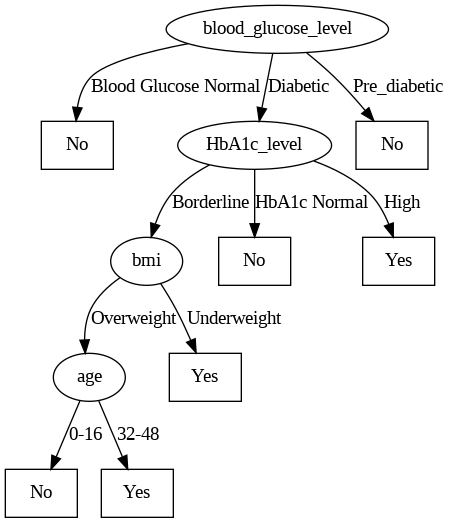

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display
clusters = 5 # try changing it

path="/content/DecisionTree.png"
img = cv2.imread(path, 1)
org_img = img
print('Org image shape --> ',img.shape)
cv2_imshow(img)
cv2.destroyAllWindows()

##8.2 Thực hiện trên toàn tập dữ liệu với api

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_age = LabelEncoder()
le_hypertension = LabelEncoder()
le_heart_disease = LabelEncoder()
le_smoking_history = LabelEncoder()
le_bmi = LabelEncoder()
le_HbA1c_level = LabelEncoder()
le_blood_glucose_level = LabelEncoder()
le_target = LabelEncoder()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
inputs['gender_n'] = le_gender.fit_transform(inputs['gender'])
inputs['age_n'] = le_age.fit_transform(inputs['age'])
inputs['hypertension_n'] = le_hypertension.fit_transform(inputs['hypertension'])
inputs['heart_disease_n'] = le_heart_disease.fit_transform(inputs['heart_disease'])
inputs['smoking_history_n'] = le_smoking_history.fit_transform(inputs['smoking_history'])
inputs['bmi_n'] = le_bmi.fit_transform(inputs['bmi'])
inputs['HbA1c_level_n'] = le_HbA1c_level.fit_transform(inputs['HbA1c_level'])
inputs['blood_glucose_level_n'] = le_blood_glucose_level.fit_transform(inputs['blood_glucose_level'])
target_n = le_target.fit_transform(target)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
inputs_n = inputs.drop(['gender','age','hypertension','heart_disease', 'smoking_history','bmi','HbA1c_level','blood_glucose_level'], axis = 'columns')
inputs_n

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender_n,age_n,hypertension_n,heart_disease_n,smoking_history_n,bmi_n,HbA1c_level_n,blood_glucose_level_n
0,0,4,1,0,3,1,2,1
2,1,1,1,1,3,1,1,1
3,0,2,1,1,0,0,1,1
4,1,4,0,0,0,0,1,1
5,0,1,1,1,3,1,2,0
...,...,...,...,...,...,...,...,...
99992,0,1,1,1,3,1,0,1
99993,0,2,1,1,3,1,1,1
99997,1,4,1,1,2,1,1,1
99998,0,1,1,1,3,1,1,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target_n, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.6666666666666666

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[11120,   259],
       [  803,   653]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     11379
           1       0.72      0.45      0.55      1456

    accuracy                           0.92     12835
   macro avg       0.82      0.71      0.75     12835
weighted avg       0.91      0.92      0.91     12835



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
feature_names = list(inputs_n.columns)
feature_names

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['gender_n',
 'age_n',
 'hypertension_n',
 'heart_disease_n',
 'smoking_history_n',
 'bmi_n',
 'HbA1c_level_n',
 'blood_glucose_level_n']

In [ ]:
model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Text(0.5194859313101302, 0.9705882352941176, 'HbA1c_level_n <= 1.5\ngini = 0.194\nsamples = 51337\nvalue = [45747, 5590]'),
 Text(0.2523035158460668, 0.9117647058823529, 'age_n <= 2.5\ngini = 0.111\nsamples = 44454\nvalue = [41840, 2614]'),
 Text(0.08113592954159593, 0.8529411764705882, 'hypertension_n <= 0.5\ngini = 0.039\nsamples = 24351\nvalue = [23872, 479]'),
 Text(0.028438030560271648, 0.7941176470588235, 'HbA1c_level_n <= 0.5\ngini = 0.205\nsamples = 741\nvalue = [655, 86]'),
 Text(0.016129032258064516, 0.7352941176470589, 'blood_glucose_level_n <= 0.5\ngini = 0.292\nsamples = 372\nvalue = [306, 66]'),
 Text(0.014997170345217883, 0.6764705882352942, 'gini = 0.0\nsamples = 77\nvalue = [77, 0]'),
 Text(0.01726089417091115, 0.6764705882352942, 'blood_glucose_level_n <= 1.5\ngini = 0.347\nsamples = 295\nvalue = [229, 66]'),
 Text(0.016129032258064516, 0.6176470588235294, 'smoking_history_n <= 2.5\ngini = 0.369\nsamples = 270\nvalue = [204, 66]'),
 Text(0.0050933786078098476, 0.5588

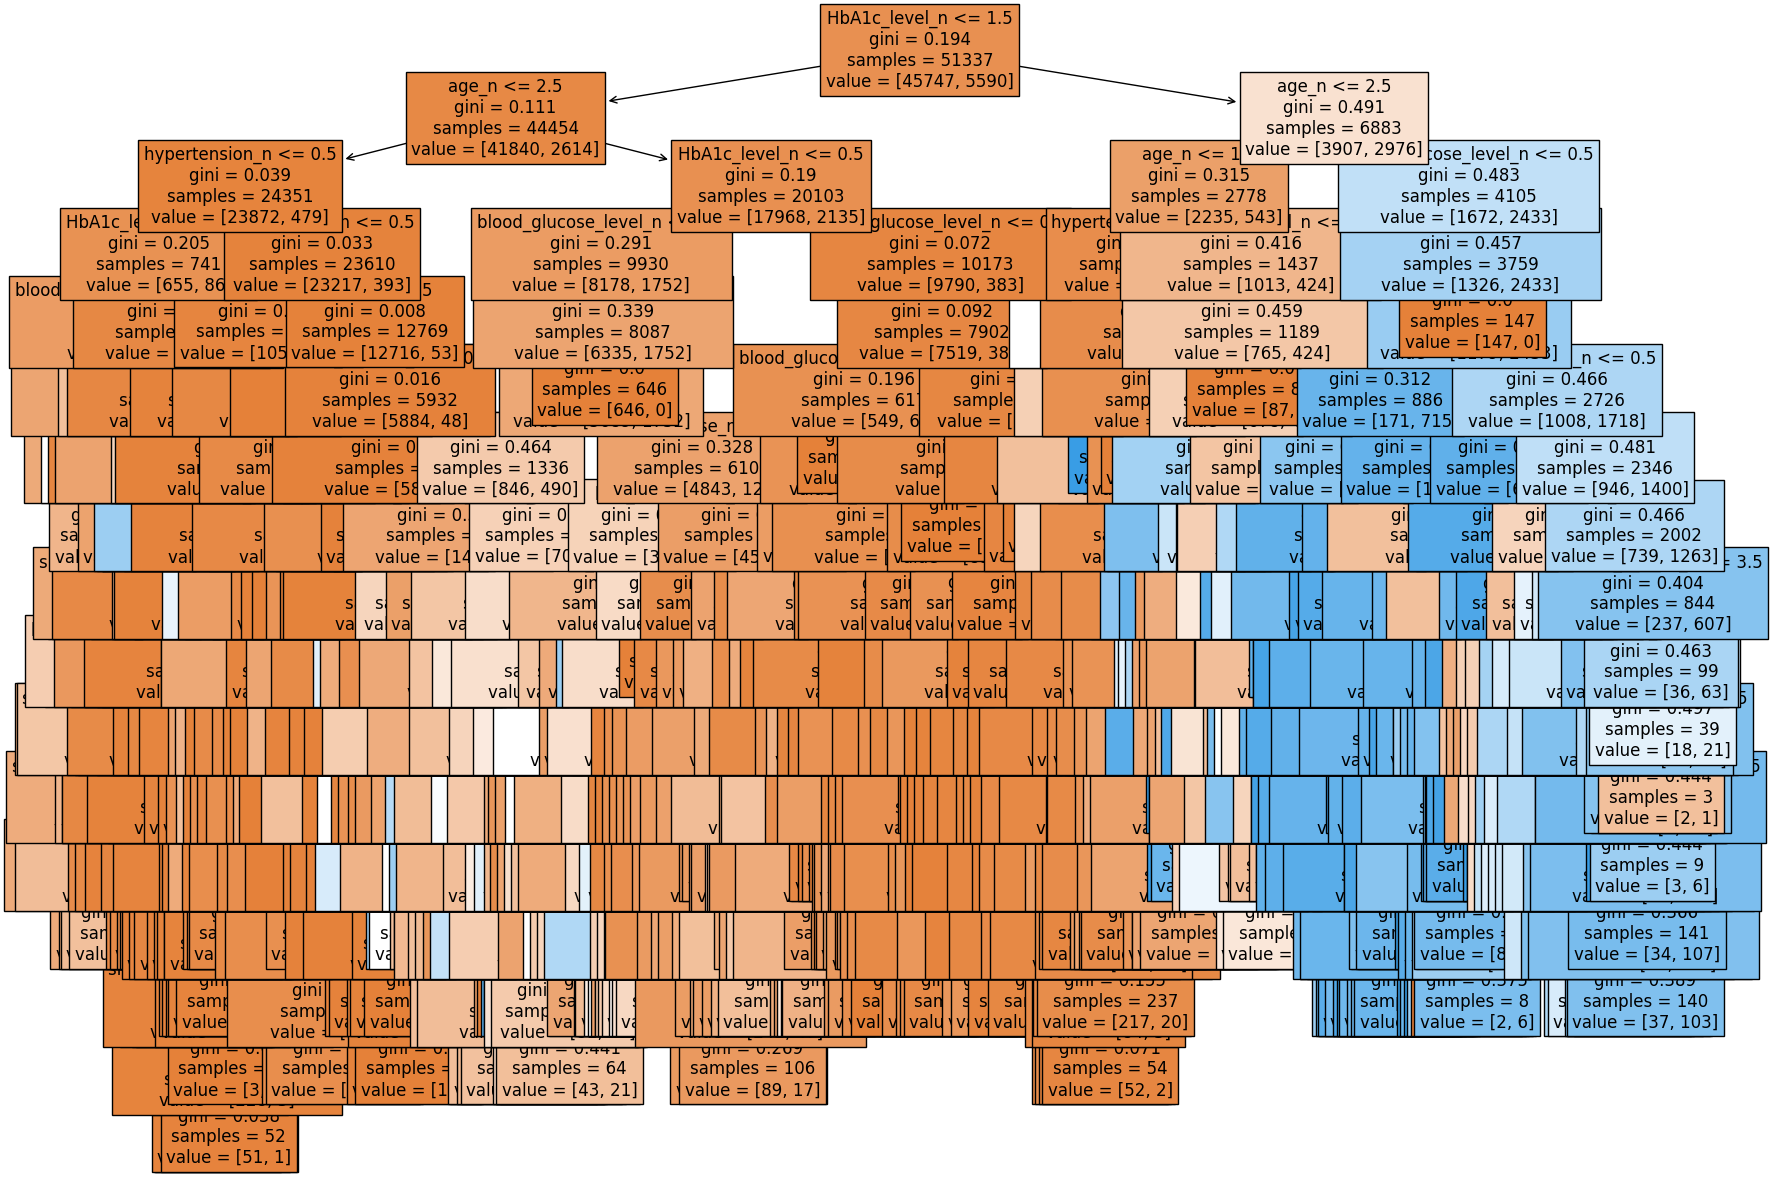

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20,15))
tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=12)